In [1]:
%run common.ipynb

['LC_Type1', 'LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LC_Type1']


In [2]:
%run tuning_common.ipynb

Using TensorFlow backend


In [3]:
import tensorflow as tf

In [4]:
MODEL_SAVE_DIR = f'{DOWNSTREAM_TRAINING_DIR}model'

In [5]:
downstream_train_df = pd.read_csv(f'{DATA_FOLDER}{DOWNSTREAM_TRAIN_FILENAME}')
downstream_test_df = pd.read_csv(f'{DATA_FOLDER}{DOWNSTREAM_TEST_FILENAME}')
downstream_train_df = embed_catgorical_features(downstream_train_df, CATEGORICAL_FEATURES)
downstream_test_df = embed_catgorical_features(downstream_test_df, CATEGORICAL_FEATURES)

In [6]:
tf.keras.backend.clear_session()

In [7]:
print(downstream_train_df.dtypes)

LC_Type1        object
LST_Day_1km    float64
pr             float64
aet            float64
NDVI           float64
EVI            float64
Gpp            float64
dtype: object


In [8]:
from sklearn.model_selection import train_test_split
split_train_df, split_val_df = train_test_split(downstream_train_df, test_size=0.2, shuffle=True, random_state=8)

In [9]:
split_train_tf = df_to_dataset(split_train_df[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=True, batch_size=256)
split_val_tf = df_to_dataset(split_val_df[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=False, batch_size=256)

/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


In [10]:
epochs = 200
lr = 0.001
weight_decay = 0.0001
new_data_metrics = 'val_output_root_mean_squared_error'
mode = 'min'

ft_model = compile_model(
    split_train_df,
    d_embedding=32, 
    n_layers=4, 
    ffn_factor=1,
    attention_dropout=0.1,
    ffn_dropout=0.1,
    residual_dropout=0.0,
    weight_decay=weight_decay,
    lr=lr
)


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor=new_data_metrics, mode=mode, patience=30, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        monitor=new_data_metrics,
        mode=mode,
        filepath=MODEL_SAVE_DIR,
        save_best_only=True,
        save_freq='epoch')
]

tf.keras.backend.clear_session()

history = ft_model.fit(
    split_train_tf, 
    epochs=epochs, 
    validation_data=split_val_tf,
    callbacks=[callbacks]
)

Epoch 1/200
3/4 [=====================>........] - ETA: 0s - loss: 290448384.0000 - importances_loss: 145238224.0000 - output_loss: 145210176.0000 - importances_root_mean_squared_error: 12051.4824 - output_root_mean_squared_error: 12050.3184 

4/4 [==============================] - 56s 10s/step - loss: 290653696.0000 - importances_loss: 145342016.0000 - output_loss: 145311680.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12054.5293 - val_loss: 297068224.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 148474816.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 12185.0244
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 290537152.0000 - importances_loss: 145342016.0000 - output_loss: 145195104.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12049.6934

4/4 [==============================] - 28s 9s/step - loss: 290537152.0000 - importances_loss: 145342016.0000 - output_loss: 145195104.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12049.6934 - val_loss: 296930880.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 148337504.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 12179.3887
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 290390912.0000 - importances_loss: 145342032.0000 - output_loss: 145048912.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12043.6250

4/4 [==============================] - 31s 10s/step - loss: 290390912.0000 - importances_loss: 145342032.0000 - output_loss: 145048912.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12043.6250 - val_loss: 296733760.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 148140384.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 12171.2930
Epoch 4/200
4/4 [==============================] - ETA: 0s - loss: 290167296.0000 - importances_loss: 145342016.0000 - output_loss: 144825264.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12034.3369

4/4 [==============================] - 28s 9s/step - loss: 290167296.0000 - importances_loss: 145342016.0000 - output_loss: 144825264.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12034.3369 - val_loss: 296413664.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 147820272.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 12158.1357
Epoch 5/200
3/4 [=====================>........] - ETA: 0s - loss: 291186784.0000 - importances_loss: 146028384.0000 - output_loss: 145158384.0000 - importances_root_mean_squared_error: 12084.2207 - output_root_mean_squared_error: 12048.1689

4/4 [==============================] - 26s 8s/step - loss: 289809504.0000 - importances_loss: 145342016.0000 - output_loss: 144467488.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 12019.4629 - val_loss: 295916096.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 147322688.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 12137.6562
Epoch 6/200
4/4 [==============================] - ETA: 0s - loss: 289259200.0000 - importances_loss: 145342016.0000 - output_loss: 143917184.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11996.5488

4/4 [==============================] - 28s 9s/step - loss: 289259200.0000 - importances_loss: 145342016.0000 - output_loss: 143917184.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11996.5488 - val_loss: 295149568.0000 - val_importances_loss: 148593424.0000 - val_output_loss: 146556128.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 12106.0371
Epoch 7/200
3/4 [=====================>........] - ETA: 0s - loss: 291918560.0000 - importances_loss: 147099728.0000 - output_loss: 144818816.0000 - importances_root_mean_squared_error: 12128.4678 - output_root_mean_squared_error: 12034.0693

4/4 [==============================] - 26s 9s/step - loss: 288401248.0000 - importances_loss: 145342016.0000 - output_loss: 143059216.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 11960.7363 - val_loss: 293971392.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 145378000.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 12057.2803
Epoch 8/200
4/4 [==============================] - ETA: 0s - loss: 287102784.0000 - importances_loss: 145342016.0000 - output_loss: 141760768.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11906.3330

4/4 [==============================] - 29s 10s/step - loss: 287102784.0000 - importances_loss: 145342016.0000 - output_loss: 141760768.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11906.3330 - val_loss: 292185984.0000 - val_importances_loss: 148593424.0000 - val_output_loss: 143592544.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 11983.0107
Epoch 9/200
3/4 [=====================>........] - ETA: 0s - loss: 287236608.0000 - importances_loss: 146404128.0000 - output_loss: 140832496.0000 - importances_root_mean_squared_error: 12099.7578 - output_root_mean_squared_error: 11867.2871

4/4 [==============================] - 29s 9s/step - loss: 285105248.0000 - importances_loss: 145342016.0000 - output_loss: 139763248.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11822.1504 - val_loss: 289521856.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 140928448.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 11871.3291
Epoch 10/200
4/4 [==============================] - ETA: 0s - loss: 282198400.0000 - importances_loss: 145342016.0000 - output_loss: 136856368.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11698.5625

4/4 [==============================] - 29s 10s/step - loss: 282198400.0000 - importances_loss: 145342016.0000 - output_loss: 136856368.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11698.5625 - val_loss: 285627712.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 137034304.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 11706.1650
Epoch 11/200
4/4 [==============================] - ETA: 0s - loss: 277874112.0000 - importances_loss: 145342016.0000 - output_loss: 132532112.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11512.2588

4/4 [==============================] - 29s 10s/step - loss: 277874112.0000 - importances_loss: 145342016.0000 - output_loss: 132532112.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 11512.2588 - val_loss: 280068928.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 131475552.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 11466.2793
Epoch 12/200
4/4 [==============================] - ETA: 0s - loss: 271879616.0000 - importances_loss: 145342016.0000 - output_loss: 126537616.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 11248.8936

4/4 [==============================] - 26s 9s/step - loss: 271879616.0000 - importances_loss: 145342016.0000 - output_loss: 126537616.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 11248.8936 - val_loss: 272389632.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 123796256.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 11126.3770
Epoch 13/200
3/4 [=====================>........] - ETA: 0s - loss: 263394096.0000 - importances_loss: 145117664.0000 - output_loss: 118276440.0000 - importances_root_mean_squared_error: 12046.4795 - output_root_mean_squared_error: 10875.4971

4/4 [==============================] - 16s 5s/step - loss: 263569392.0000 - importances_loss: 145342016.0000 - output_loss: 118227376.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 10873.2412 - val_loss: 262240448.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 113647040.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 10660.5361
Epoch 14/200
3/4 [=====================>........] - ETA: 0s - loss: 255345280.0000 - importances_loss: 146539280.0000 - output_loss: 108805992.0000 - importances_root_mean_squared_error: 12105.3418 - output_root_mean_squared_error: 10431.0107

4/4 [==============================] - 9s 3s/step - loss: 252927184.0000 - importances_loss: 145342016.0000 - output_loss: 107585168.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 10372.3271 - val_loss: 249303088.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 100709664.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 10035.4209
Epoch 15/200
3/4 [=====================>........] - ETA: 0s - loss: 238880320.0000 - importances_loss: 144929408.0000 - output_loss: 93950904.0000 - importances_root_mean_squared_error: 12038.6631 - output_root_mean_squared_error: 9692.8271

4/4 [==============================] - 9s 3s/step - loss: 239408208.0000 - importances_loss: 145342016.0000 - output_loss: 94066192.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 9698.7725 - val_loss: 234011520.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 85418120.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 9242.1924
Epoch 16/200
3/4 [=====================>........] - ETA: 0s - loss: 226631936.0000 - importances_loss: 146727312.0000 - output_loss: 79904616.0000 - importances_root_mean_squared_error: 12113.1045 - output_root_mean_squared_error: 8938.9385

4/4 [==============================] - 9s 3s/step - loss: 224044288.0000 - importances_loss: 145342016.0000 - output_loss: 78702256.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 8871.4287 - val_loss: 217540368.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 68946936.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 8303.4287
Epoch 17/200
3/4 [=====================>........] - ETA: 0s - loss: 210276656.0000 - importances_loss: 146693840.0000 - output_loss: 63582816.0000 - importances_root_mean_squared_error: 12111.7236 - output_root_mean_squared_error: 7973.8833

4/4 [==============================] - 10s 3s/step - loss: 207934592.0000 - importances_loss: 145342016.0000 - output_loss: 62592580.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 7911.5474 - val_loss: 202700192.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 54106808.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 7355.7329
Epoch 18/200
3/4 [=====================>........] - ETA: 0s - loss: 195201648.0000 - importances_loss: 145497968.0000 - output_loss: 49703660.0000 - importances_root_mean_squared_error: 12062.2539 - output_root_mean_squared_error: 7050.0820

4/4 [==============================] - 23s 7s/step - loss: 194542528.0000 - importances_loss: 145342016.0000 - output_loss: 49200492.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 7014.3062 - val_loss: 193268016.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 44674620.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 6683.9077
Epoch 19/200
4/4 [==============================] - ETA: 0s - loss: 187381856.0000 - importances_loss: 145342032.0000 - output_loss: 42039824.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 6483.8125

4/4 [==============================] - 26s 9s/step - loss: 187381856.0000 - importances_loss: 145342032.0000 - output_loss: 42039824.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 6483.8125 - val_loss: 191217520.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 42624124.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 6528.7153
Epoch 20/200
4/4 [==============================] - 1s 245ms/step - loss: 186652720.0000 - importances_loss: 145342016.0000 - output_loss: 41310700.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 6427.3398 - val_loss: 191615952.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 43022568.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 6559.1592
Epoch 21/200
4/4 [==============================] - ETA: 0s - loss: 186054528.0000 - importances_loss: 145342016.0000 -

4/4 [==============================] - 27s 9s/step - loss: 186054528.0000 - importances_loss: 145342016.0000 - output_loss: 40712504.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 6380.6353 - val_loss: 188893904.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 40300512.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 6348.2686
Epoch 22/200
4/4 [==============================] - ETA: 0s - loss: 183015312.0000 - importances_loss: 145342016.0000 - output_loss: 37673316.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 6137.8594

4/4 [==============================] - 27s 9s/step - loss: 183015312.0000 - importances_loss: 145342016.0000 - output_loss: 37673316.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 6137.8594 - val_loss: 186034560.0000 - val_importances_loss: 148593424.0000 - val_output_loss: 37441136.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 6118.9160
Epoch 23/200
4/4 [==============================] - ETA: 0s - loss: 180536080.0000 - importances_loss: 145342032.0000 - output_loss: 35194052.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5932.4575

4/4 [==============================] - 29s 10s/step - loss: 180536080.0000 - importances_loss: 145342032.0000 - output_loss: 35194052.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5932.4575 - val_loss: 185874016.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 37280628.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 6105.7866
Epoch 24/200
4/4 [==============================] - ETA: 0s - loss: 179751504.0000 - importances_loss: 145342016.0000 - output_loss: 34409472.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5865.9590

4/4 [==============================] - 30s 10s/step - loss: 179751504.0000 - importances_loss: 145342016.0000 - output_loss: 34409472.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5865.9590 - val_loss: 184077840.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 35484448.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 5956.8823
Epoch 25/200
4/4 [==============================] - ETA: 0s - loss: 177674352.0000 - importances_loss: 145342016.0000 - output_loss: 32332344.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 5686.1538

4/4 [==============================] - 29s 9s/step - loss: 177674352.0000 - importances_loss: 145342016.0000 - output_loss: 32332344.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 5686.1538 - val_loss: 181466976.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 32873588.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 5733.5493
Epoch 26/200
4/4 [==============================] - ETA: 0s - loss: 174762640.0000 - importances_loss: 145342016.0000 - output_loss: 29420606.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5424.0767

4/4 [==============================] - 29s 9s/step - loss: 174762640.0000 - importances_loss: 145342016.0000 - output_loss: 29420606.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 5424.0767 - val_loss: 178231616.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 29638218.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 5444.0996
Epoch 27/200
3/4 [=====================>........] - ETA: 0s - loss: 169542160.0000 - importances_loss: 143892544.0000 - output_loss: 25649626.0000 - importances_root_mean_squared_error: 11995.5215 - output_root_mean_squared_error: 5064.5459

4/4 [==============================] - 20s 7s/step - loss: 171291552.0000 - importances_loss: 145342016.0000 - output_loss: 25949540.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 5094.0693 - val_loss: 175111376.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 26517990.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 5149.5620
Epoch 28/200
3/4 [=====================>........] - ETA: 0s - loss: 168810320.0000 - importances_loss: 146434176.0000 - output_loss: 22376146.0000 - importances_root_mean_squared_error: 12100.9990 - output_root_mean_squared_error: 4730.3433

4/4 [==============================] - 27s 9s/step - loss: 167553584.0000 - importances_loss: 145342016.0000 - output_loss: 22211560.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4712.9141 - val_loss: 173032352.0000 - val_importances_loss: 148593408.0000 - val_output_loss: 24438948.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4943.5767
Epoch 29/200
4/4 [==============================] - ETA: 0s - loss: 164867952.0000 - importances_loss: 145342016.0000 - output_loss: 19525938.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4418.8164

4/4 [==============================] - 26s 9s/step - loss: 164867952.0000 - importances_loss: 145342016.0000 - output_loss: 19525938.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4418.8164 - val_loss: 172013856.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 23420470.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 4839.4702
Epoch 30/200
3/4 [=====================>........] - ETA: 0s - loss: 165446640.0000 - importances_loss: 146506864.0000 - output_loss: 18939774.0000 - importances_root_mean_squared_error: 12104.0029 - output_root_mean_squared_error: 4351.9849

4/4 [==============================] - 27s 9s/step - loss: 164004784.0000 - importances_loss: 145342016.0000 - output_loss: 18662764.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4320.0420 - val_loss: 171118928.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 22525538.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 4746.1079
Epoch 31/200
3/4 [=====================>........] - ETA: 0s - loss: 162604272.0000 - importances_loss: 144915056.0000 - output_loss: 17689216.0000 - importances_root_mean_squared_error: 12038.0664 - output_root_mean_squared_error: 4205.8550

4/4 [==============================] - 25s 8s/step - loss: 163092576.0000 - importances_loss: 145342016.0000 - output_loss: 17750556.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 4213.1411 - val_loss: 170962304.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 22368912.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4729.5786
Epoch 32/200
4/4 [==============================] - ETA: 0s - loss: 163145040.0000 - importances_loss: 145342016.0000 - output_loss: 17803038.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4219.3647

4/4 [==============================] - 29s 10s/step - loss: 163145040.0000 - importances_loss: 145342016.0000 - output_loss: 17803038.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4219.3647 - val_loss: 170670128.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 22076742.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4698.5894
Epoch 33/200
3/4 [=====================>........] - ETA: 0s - loss: 164786128.0000 - importances_loss: 147272272.0000 - output_loss: 17513850.0000 - importances_root_mean_squared_error: 12135.5791 - output_root_mean_squared_error: 4184.9551

4/4 [==============================] - 28s 9s/step - loss: 162606320.0000 - importances_loss: 145342016.0000 - output_loss: 17264302.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4155.0332 - val_loss: 170281328.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21687930.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 4657.0303
Epoch 34/200
4/4 [==============================] - 1s 175ms/step - loss: 162649200.0000 - importances_loss: 145342016.0000 - output_loss: 17307178.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4160.1895 - val_loss: 170363184.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21769792.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4665.8110
Epoch 35/200
4/4 [==============================] - 1s 159ms/step - loss: 162348960.0000 - importances_loss: 145342016.

4/4 [==============================] - 29s 10s/step - loss: 161641696.0000 - importances_loss: 145342016.0000 - output_loss: 16299677.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4037.2859 - val_loss: 170154336.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21560952.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4643.3774
Epoch 45/200
4/4 [==============================] - ETA: 0s - loss: 161652496.0000 - importances_loss: 145342016.0000 - output_loss: 16310470.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4038.6223

4/4 [==============================] - 22s 7s/step - loss: 161652496.0000 - importances_loss: 145342016.0000 - output_loss: 16310470.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4038.6223 - val_loss: 169974096.0000 - val_importances_loss: 148593424.0000 - val_output_loss: 21380668.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4623.9233
Epoch 46/200
4/4 [==============================] - 0s 90ms/step - loss: 161898496.0000 - importances_loss: 145342016.0000 - output_loss: 16556476.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4068.9651 - val_loss: 169996976.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21403578.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4626.3999
Epoch 47/200
4/4 [==============================] - 0s 66ms/step - loss: 161603680.0000 - importances_loss: 145342000.00

4/4 [==============================] - 9s 3s/step - loss: 161806496.0000 - importances_loss: 145342016.0000 - output_loss: 16464474.0000 - importances_root_mean_squared_error: 12055.7871 - output_root_mean_squared_error: 4057.6438 - val_loss: 169535168.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 20941780.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4576.2188
Epoch 56/200
4/4 [==============================] - 0s 66ms/step - loss: 161817568.0000 - importances_loss: 145342016.0000 - output_loss: 16475558.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4059.0095 - val_loss: 169725024.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21131630.0000 - val_importances_root_mean_squared_error: 12189.8906 - val_output_root_mean_squared_error: 4596.9150
Epoch 57/200
3/4 [=====================>........] - ETA: 0s - loss: 162112976.0000 - importances_loss: 146123392.0000 - o

4/4 [==============================] - 9s 3s/step - loss: 161358128.0000 - importances_loss: 145342016.0000 - output_loss: 16016109.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 4002.0132 - val_loss: 169344992.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 20751600.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4555.3926
Epoch 58/200
4/4 [==============================] - 0s 82ms/step - loss: 161118192.0000 - importances_loss: 145342016.0000 - output_loss: 15776169.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 3971.9226 - val_loss: 169695008.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 21101620.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4593.6499
Epoch 59/200
4/4 [==============================] - 0s 71ms/step - loss: 160891456.0000 - importances_loss: 145342016.000

4/4 [==============================] - 9s 3s/step - loss: 160694656.0000 - importances_loss: 145342016.0000 - output_loss: 15352625.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 3918.2427 - val_loss: 169256960.0000 - val_importances_loss: 148593392.0000 - val_output_loss: 20663560.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4545.7188
Epoch 67/200
4/4 [==============================] - 0s 75ms/step - loss: 160957248.0000 - importances_loss: 145342016.0000 - output_loss: 15615235.0000 - importances_root_mean_squared_error: 12055.7881 - output_root_mean_squared_error: 3951.6118 - val_loss: 169694352.0000 - val_importances_loss: 148593424.0000 - val_output_loss: 21100930.0000 - val_importances_root_mean_squared_error: 12189.8896 - val_output_root_mean_squared_error: 4593.5747
Epoch 68/200
4/4 [==============================] - 0s 72ms/step - loss: 161296496.0000 - importances_loss: 145342016.000

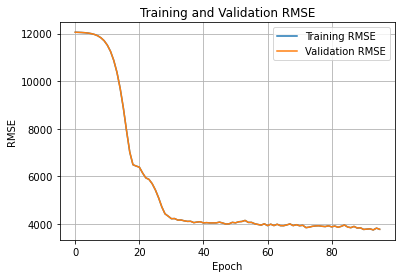

In [11]:
plot_model_history(history, 'output_root_mean_squared_error', new_data_metrics,'RMSE')

In [14]:
ft_model.save(MODEL_SAVE_DIR)

In [12]:
model_reload = tf.keras.models.load_model(MODEL_SAVE_DIR)

In [13]:
val_result = get_predict_result(model_reload, split_val_df[FEATURES], split_val_df[TARGET_FEATURE])

/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


200/200 [==============================] - 1s 5ms/step
Linear Encoding RMSE: 4545.7187


#### Evaluate test dataset

In [14]:
predict_result = get_predict_result(model_reload, downstream_test_df[FEATURES], downstream_test_df[TARGET_FEATURE])
fluxnet_modis_test_df = get_modis_compare_data(predict_result['output'].ravel())
get_modis_result(fluxnet_modis_test_df[TARGET_FEATURE], downstream_test_df[TARGET_FEATURE])

 16/160 [==>...........................] - ETA: 1s

/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


160/160 [==============================] - 4s 25ms/step
Linear Encoding RMSE: 4883.3868
MOD17 RMSE: 4554.8151


In [17]:
get_r2_compare_data(predict_result["output"].ravel(), fluxnet_modis_test_df[TARGET_FEATURE], downstream_test_df[TARGET_FEATURE])

R-Squared prediction: 0.5236061789511649
R-Squared MOD17: 0.5855564594538872


<ipython-input-2-73ed0f6d1bee>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(actual_df, actual_df, '-g', color='red')


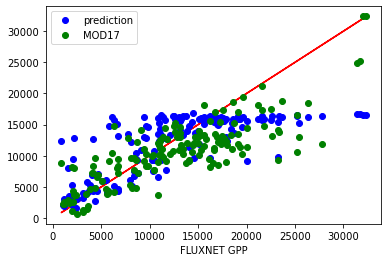

In [15]:
plot_result_distribution(downstream_test_df[TARGET_FEATURE], predict_result['output'].ravel(), fluxnet_modis_test_df[TARGET_FEATURE])